In [1]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
kaggle_dic = json.load(open('kaggle.json'))

In [3]:
os.environ["KAGGLE_USERNAME"] = kaggle_dic['username']
os.environ["KAGGLE_KEY"] = kaggle_dic['key']

In [4]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.13G [00:00<?, ?B/s]
  1%|          | 12.0M/2.13G [00:00<00:18, 122MB/s]
  1%|1         | 24.0M/2.13G [00:00<00:20, 109MB/s]
  2%|1         | 35.0M/2.13G [00:00<00:21, 105MB/s]
  2%|2         | 46.0M/2.13G [00:00<00:20, 108MB/s]
  3%|2         | 58.0M/2.13G [00:00<00:19, 113MB/s]
  3%|3         | 69.0M/2.13G [00:00<00:19, 112MB/s]
  4%|3         | 80.0M/2.13G [00:01<00:45, 48.1MB/s]
  4%|4         | 91.0M/2.13G [00:01<00:38, 57.5MB/s]
  5%|4         | 100M/2.13G [00:01<00:34, 64.1MB/s] 
  5%|4         | 109M/2.13G [00:01<00:31, 68.2MB/s]
  5%|5         | 118M/2.13G [00:01<00:31, 69.7MB/s]
  6%|5         | 128M/2.13G [00:01<00:28, 76.6MB/s]
  6%|6         | 139M/2.13G [00:01<00:25, 83.8MB/s]
  7%|6         | 150M/2.13G [00:01<00:23, 91.2MB/s]
  7%|7         | 161M/2.13G [00:02<00:22, 94.4MB/s]
  8%|7         | 171M/2.13G [00:02<00:22, 94.2MB/s]
  8%|8         | 181M/2.13G [00:02<00:23, 89.0MB/s]
  9%|8         | 191M/2.13G [00:02<00:22, 91.0MB/s]
  9%|9         |

In [12]:
# !unzip leapgestrecog.zip -d leapgestrecog

In [15]:
!dir leapgestrecog

 Volume in drive D is New Volume
 Volume Serial Number is 50AD-2AC7

 Directory of D:\Internship\SkillCraft\leapgestrecog

21-09-2025  12:33    <DIR>          .
21-09-2025  12:35    <DIR>          ..
21-09-2025  12:34    <DIR>          leapGestRecog
               0 File(s)              0 bytes
               3 Dir(s)  96,774,721,536 bytes free


In [16]:
# --- Step 1: Import Libraries ---
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [21]:
# --- Step 2: Set Dataset Path ---
dataset_path = r'D:\Internship\SkillCraft\leapgestrecog\leapGestRecog'

In [22]:
# --- Step 3: Load Images ---
IMG_SIZE = 64  # Resize images to 64x64
X = []
y = []

for label in sorted(os.listdir(dataset_path)):
    class_folder = os.path.join(dataset_path, label)
    if os.path.isdir(class_folder):
        for sample_folder_name in os.listdir(class_folder):
            sample_folder = os.path.join(class_folder, sample_folder_name)
            if os.path.isdir(sample_folder):
                for file_name in os.listdir(sample_folder):
                    if file_name.endswith('.png'):
                        file_path = os.path.join(sample_folder, file_name)
                        img = cv2.imread(file_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                            X.append(img)
                            y.append(int(label))
                        else:
                            print(f"Failed to read {file_path}")

X = np.array(X, dtype='float32') / 255.0  # Normalize images
y = to_categorical(np.array(y), num_classes=10)

print("Total images loaded:", X.shape[0])

Total images loaded: 20000


In [23]:
# --- Step 4: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 16000
Testing samples: 4000


In [24]:
# --- Step 5: Build CNN Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Lakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# --- Step 6: Train Model ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7260 - loss: 0.7924 - val_accuracy: 0.9900 - val_loss: 0.0224
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9868 - loss: 0.0350 - val_accuracy: 0.9912 - val_loss: 0.0152
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9878 - loss: 0.0276 - val_accuracy: 0.9902 - val_loss: 0.0163
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9910 - loss: 0.0167 - val_accuracy: 0.9893 - val_loss: 0.0191
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9915 - loss: 0.0177 - val_accuracy: 0.9923 - val_loss: 0.0133
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9906 - loss: 0.0167 - val_accuracy: 0.9925 - val_loss: 0.0134
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9910 - loss: 0.0170 - val_accuracy: 0.9920 - val_loss: 0.0126
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9918 - loss: 0.0143 - 

In [26]:
# --- Step 7: Evaluate Model ---
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9926 - loss: 0.0118
Test Accuracy: 0.9915000200271606


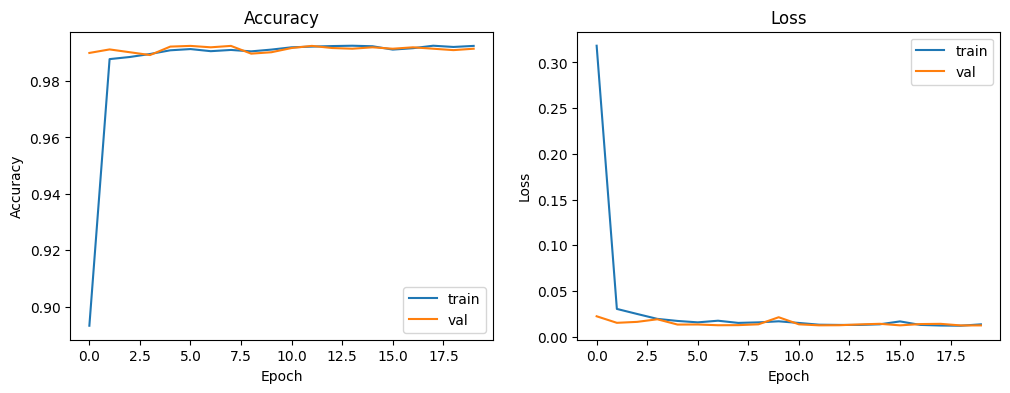

In [27]:
# --- Step 8: Plot Training History ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# --- Step 9: Save Model ---
model.save('gesture_cnn_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [29]:
from tensorflow.keras.models import load_model

model = load_model('gesture_cnn_model.h5')

In [30]:
class_labels = {
    0: "palm",
    1: "l",
    2: "fist",
    3: "fist_moved",
    4: "thumb",
    5: "index",
    6: "ok",
    7: "palm_moved",
    8: "c",
    9: "down"
}

In [31]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (64, 64))
    img_normalized = img_resized / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predict
    pred = model.predict(img_input)
    pred_class = np.argmax(pred)

    # Display prediction on frame
    cv2.putText(frame, f"{class_labels[pred_class]}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━